# Week 2 (K-means, K-medoids, Gaussian Mixtures)

This week we are going to work with K-means, K-medoids, and Gaussian Mixtures.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Local imports (used for the last optional exercise.)
import math
import itertools
import sys
sys.path.append(".")
from utilities.load_data import load_iris, load_iris_PC, index_to_feature

## Exercise 1: Warmup
Please provide a brief description of what characterises 
1. Clustering as a task 
2. Representative-based clustering as a clustering approach 

## Exercise 2: Practical K-means
Given the following points: 2, 4, 10, 12, 3, 20, 30, 11, 25. Assume $k=3$, and that we randomly pick the initial means $\mu_1=2$, $ \mu_2=4$ and $\mu_3=6$. Show the clusters obtained using K-means algorithm after one iteration, and show the new means for the next iteration.

In [23]:
# You can use python if you want but it is not required!
X = np.array([2, 4, 10, 12, 3, 20, 30, 11, 25])

## Exercise 3
Which algorithm is more robust: k-means or k-medoid and why? 

## Exercise 4: Practical Mixture of Gaussians
Given the data points in table below, and their probability of belonging to two clusters.
Assume that these points were produced by a mixture of two univariate normal distributions. 
Answer the following questions:

1. Find the maximum likelihood estimate of the means $\mu_1$ and $\mu_2$
2. Assume that $\mu_1 = 2$, $\mu_2 = 7$, and $\sigma_1 = \sigma_2 = 1$. Find the probability that the point $x=5$ belongs to cluster $C_1$ and to cluster $C_2$. You may assume that the prior probability of each cluster is equal (i.e., $P(C_1) = P(C_2) = 0.5$), and the prior probability $P(x=5) = 0.029$

|$x$|$P(C_1\mid x)$|$P(C_2\mid x)$|
|:---:|:---:|:---:|
| --- | ---------------- | ---------------- |
|2 |  0.9  |  0.1  |
|3|0.8|0.2|
|7|0.3|0.7|
|9|0.1|0.9|
|2|0.9|0.1|
|1|0.8|0.2|


In [24]:
# If you want, you can use python here.
# Note that there is a
X            = np.array([2, 3, 7, 9, 2, 1])
P_C1_given_x = np.array([0.9, 0.8, 0.3, 0.1, 0.9, 0.8])
P_C2_given_x = 1 - P_C1_given_x

# TODO

## Exercise 5
For which parameter $\mu,\Sigma,P(C)$ settings is EM clustering identical to k-means clustering and why?<br>
Mean $\mu_i = \frac{{\sum_{j=1}^{n}{x_j} w_{ij}}}{\sum_{j=1}^{n}{w_{ij}}}$<br>
Covariance $\Sigma_i = \frac{\sum_{j=1}^{n}w_{ij}(x_j - \mu_i)(x_j - \mu_i)^\top}{\sum_{j=1}^{n} w_{ij}}$<br>
Prior $P(c_i) = \frac{\sum_{j=1}^{n}w_{ij}}{n}$<br>

## Exercise 6: 2d K-means and gaussian mixture
Given the two-dimensional points in Table 13.2, assume that $k=2$, and that initially the points are assigned to clusters as follors: $C_1 = \{ x_1, x_2, x_4 \}$ and $C_2 = \{ x_3, x_5 \}$.
Answer the following questions:

1. Apply the K-means algorithm until convergence, that is, the clusters do not change, assuming (1) the usual Euclidean distance of the $L_2$-norm as the distance between points, defined as

$$
||x_i - x_j||_2 = \sqrt{ \sum_{a=1}^d (x_{ia} - x_{ja})^2 }
$$
 and (2) the Manhattan distance of the $L_1$-norm
$$
||x_i - x_j||_1 = \sum_{a=1}^d |x_{ia} - x_{ja}|.
$$

2. Apply the EM algorithm with $k=2$ assuming that the dimensions are independent. Show one complete execution of the expectation and the maximization steps. Start with the assumption that $P(C_i | x_{ja}) = 0.5$ for $a=1, 2$ and $j=1, ..., 5$.


![Table 13.2](graphics/13.2.png)

In [25]:
# Again, if you want, you can use a bit of Python
X = np.array([
    [0, 0, 1.5, 5, 5],
    [2, 0,   0, 0, 2]
]).T # shape [5, 2]

# Optionals
## Exercise 7
Consider 2D data (2,2), (2,1), (2,3), (1,2), (3,2), (8,2), (8,1), (8,0), (8,3), (8,4), (7,2), (6,2), (9,2), (10,2), (7,1), (7,3), (9,1), (9,3)  

![Data plotted](graphics/two_cluster_dataplot.png)

1. let k=2 and sketch visually what you think the final clustering will be and explain why. 
2. Does the initialization influence the final clustering? And why?

## Exercise 8: K-means and the Iris dataset

In this exercise, we will apply K-means to the two 2PC dataset from [Zaki] (and slides from Week 2).
You may use the code below as inspiration.

C:\Users\au647909\OneDrive - Aarhus universitet\Skrivebord\dm2023-solutions\exercises\utilities/data/iris-PC.txt


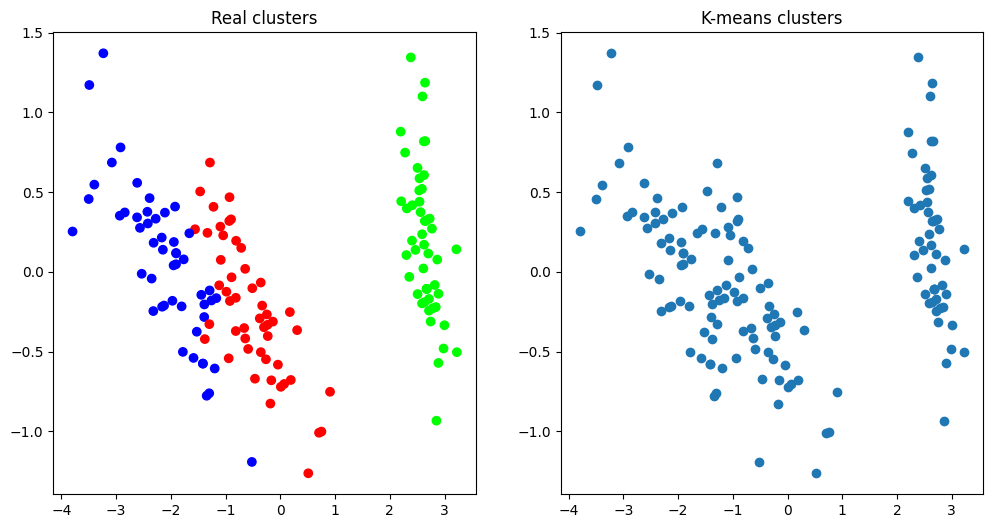

In [26]:
X, y = load_iris_PC()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(*(X.T), c=y)
ax[0].set_title("Real clusters")

def kmeans(X, k):
    """
        Arguments:
            k: int specifying number of clusters
            X: numpy array with data
        Returns:
            clusters: Array of indicators (ints) indicating the cluster of each point. Shape: [n,]
    """
    n, d = X.shape
    clusters = None 
    new_clusters = None
    centroids = np.random.randn(k, d) # K clusters of shape d
    
    while clusters is None or (not np.allclose(clusters, new_clusters)):
        clusters = None # TODO assign points to clusters
        centroids = None # TODO reassign centroids
        break # Remove this. It is to prevent you getting an infinite loop if you try to run the code before modifying it
        
    return clusters

clusters = kmeans(X, 3)
ax[1].scatter(*(X.T), c=clusters)
ax[1].set_title("K-means clusters")
plt.show()
